In [1]:
import numpy as np
import pandas as pd

In [2]:
file=pd.read_csv('/content/data.csv')
df=pd.DataFrame(file)


## Given is Yahoo Finance! - Dow Jones Industrial Average data, perform the following task:

### Q1. Perform the following EDA tasks:
<br>a.	Check the dimensions of the data
<br>b.	Get the summary statistics and share the insights
<br>c.	Standardize the features whenever required





a. Check the dimensions of the data

In [4]:
df.shape

(2014, 7)

b.	Get the summary statistics and share the insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2014 non-null   object 
 1   Open       2014 non-null   float64
 2   High       2014 non-null   float64
 3   Low        2014 non-null   float64
 4   Close      2014 non-null   float64
 5   Adj Close  2014 non-null   float64
 6   Volume     2014 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.3+ KB


In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**there is no null values in dataset**

In [7]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


**there is no duplicates in dataset**

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-27,9982.179688,10159.879883,9936.620117,10150.650391,10150.650391,207760000
1,2010-08-30,10145.580078,10150.570313,10007.679688,10009.730469,10009.730469,150480000
2,2010-08-31,10006.419922,10073.379883,9941.839844,10014.719727,10014.719727,255420000
3,2010-09-01,10016.009766,10279.080078,10016.009766,10269.469727,10269.469727,205710000
4,2010-09-02,10270.080078,10320.370117,10253.959961,10320.099609,10320.099609,149930000


In [10]:
df['Date']=pd.to_datetime(df['Date'])

**converting Date column to datetime **

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2.014000e+03
mean,16756.880170,16835.962791,16676.660195,16762.755255,16762.755255,1.699523e+08
std,3985.884743,3992.888506,3977.350484,3984.242430,3984.242430,1.072222e+08
min,9982.179688,10073.379883,9936.620117,10009.730469,10009.730469,8.410000e+06
25%,13104.239746,13175.674805,13045.425049,13107.277588,13107.277588,9.486500e+07
50%,16566.544922,16652.890625,16500.360352,16571.265625,16571.265625,1.284750e+08
75%,18282.699219,18350.062988,18205.062500,18287.908203,18287.908203,2.177400e+08
max,26584.279297,26616.710938,26435.339844,26616.710938,26616.710938,8.239400e+08


**gives all the statistics measures of each column**

c.	Standardize the features whenever required

In [12]:
df.drop(['Date'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2014 non-null   float64
 1   High       2014 non-null   float64
 2   Low        2014 non-null   float64
 3   Close      2014 non-null   float64
 4   Adj Close  2014 non-null   float64
 5   Volume     2014 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 94.5 KB


In [15]:
x=df.iloc[:,[0,1,2,4,5]]
y=df.iloc[:,3]

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

### Q2. Build the multi-level perceptron regression model to predict close value of stocks and check the model performance

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [28]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()
mlp.fit(x_train,y_train)
y_pred=mlp.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [29]:
from sklearn.metrics import mean_squared_error,r2_score
import math
print('mean_squared_error',end=" ")
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 accuracy score',end=" ")
print(r2_score(y_test,y_pred))


mean_squared_error 16280.285775775526
R2 accuracy score -16.232051800915542


In [30]:
print(y_test)


1198    18076.269531
526     13485.969727
393     13170.190430
1407    17792.750000
433     12598.549805
            ...     
1769    21784.779297
772     15401.379883
522     13579.469727
513     13254.290039
81      11559.490234
Name: Close, Length: 665, dtype: float64


In [31]:
print(y_pred)

[ 352.5230529   939.5454371   958.52676573  350.1981631  1045.69916202
 1056.85846921  362.70593519  986.11986355 1306.90538947  952.75449626
  990.92941456  354.02502773  350.06329077 1010.72188646  490.49724983
  652.01493901  345.91957217 1066.48399055  351.09910559 1138.88552042
 1753.65680927 1814.12957916  398.13585494  352.60864274  998.2885575
  329.05039717  373.91618219 1596.08951036  970.86693737 1617.95792879
  399.58444152 1361.04161097 1349.94056963  951.22906073  361.23007252
  532.03766728  639.83716658 1137.43405469  908.61342915  429.11866894
  716.00003792 1107.77806709 1158.98674631 1015.75260426 1077.79512785
 1068.75648823  331.68116787  962.32202755 1274.00976117  530.04982986
 2076.17525932 1135.46108101  347.61632123 1049.15011302  373.82877571
  342.89222983 1228.34544227 1253.89522867  374.10629217  393.29340154
 1192.01094999  964.95829599  840.65145994  345.778255    342.36200765
  979.48036785  397.40696324 1033.28259576 1195.09766788  831.07182553
  987.1

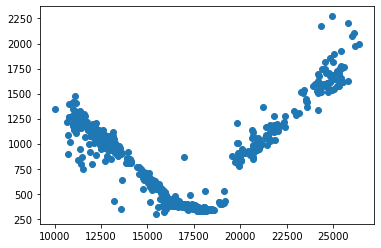

In [33]:
import matplotlib.pyplot as mtp
mtp.scatter(y_test,y_pred)
mtp.show()

### Q3. Build the neural network model with  Hidden Layers, Activation Function, Solver and Learning Rate hyperparameters and check the accuracy of the model.

In [40]:
build=MLPRegressor(hidden_layer_sizes=(40,50,10),activation='relu',solver='lbfgs',learning_rate='adaptive')

In [41]:
build.fit(x_train,y_train)
y_pred=build.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [42]:
print('mean_squared_error',end=" ")
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 accuracy score',end=" ")
print(r2_score(y_test,y_pred))

mean_squared_error 9.408333029583249
R2 accuracy score 0.9999942450930343


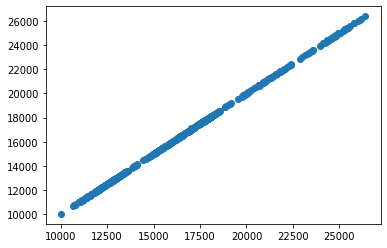

In [43]:
mtp.scatter(y_test,y_pred)
mtp.show()